## ExMAS
> Equilibrium matching


In [1]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching
from ExMAS.extras import games, pricings, prunings, pipeline

In [6]:
params = ExMAS.utils.get_config('ExMAS/spinoffs/game/pipe.json') # load the default 
params.t0 = pd.to_datetime(params.t0)
params.matching_obj = 'u_pax'
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph
params.nP = 50
params.simTime = 0.1
params.shared_discount = 0.3
inData = ExMAS.utils.generate_demand(inData, params)  # generate requests

In [7]:
from ExMAS.main import init_log
params.logger_level = 'WARNING'
inData.logger = init_log(params)

In [8]:
inData = ExMAS.main(inData, params, plot = False)
KPIs = inData.sblts.res.to_frame('u_pax')
inData = games.prepare_PoA(inData)  # prepare data structures

10-02-21 11:41:43-WARNING-Prepare for game:  1/6
10-02-21 11:41:44-WARNING-Prepare for game:  2/6
10-02-21 11:41:44-WARNING-Prepare for game:  3/6
10-02-21 11:41:44-WARNING-Prepare for game:  4/6
10-02-21 11:41:50-WARNING-Prepare for game:  5/6
10-02-21 11:41:51-WARNING-Prepare for game:  6/6


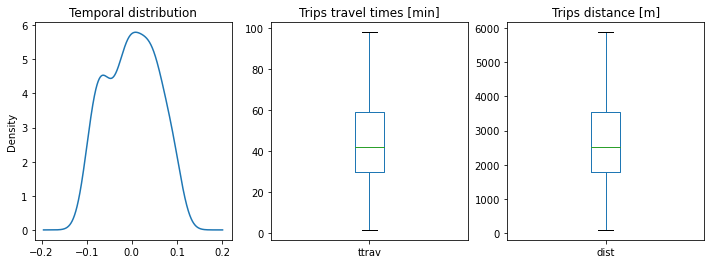

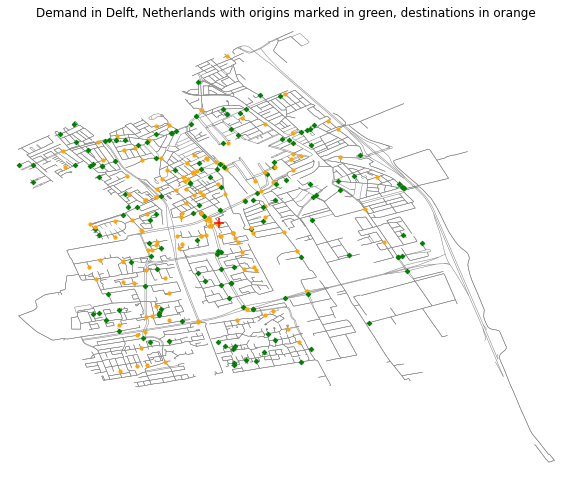

In [13]:
ExMAS.utils.plot_demand(inData, params)

### incidence matrix
rows are trips columns are rides,
1 if trip blongs to a ride, 0 otherwise

### parameters

eq. 1 , eq.2

In [11]:

params.time_cost = params.VoT # travellers' cost per travel time
params.wait_cost = params.time_cost*1.5 # and waiting
params.sharing_penalty_fixed = 0 # fixed penalty (EUR) per 
params.sharing_penalty_multiplier = 0.2 # fixed penalty (EUR) per 

params.veh_cost = 2.3*params.VoT/params.avg_speed # operating costs per kilometer
params.fixed_ride_cost = 0.5 # ride fixed costs (per vehicle)

In [12]:
inData = games.prepare_PoA(inData)

10-02-21 11:42:16-WARNING-Prepare for game:  1/6
10-02-21 11:42:16-WARNING-Prepare for game:  2/6
10-02-21 11:42:17-WARNING-Prepare for game:  3/6
10-02-21 11:42:17-WARNING-Prepare for game:  4/6
10-02-21 11:42:24-WARNING-Prepare for game:  5/6
10-02-21 11:42:25-WARNING-Prepare for game:  6/6


In [13]:
inData.sblts.rides_multi_index.loc[rs,:]

NameError: name 'rs' is not defined

In [14]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']



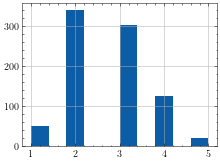

In [15]:
inData.sblts.rides_multi_index.degree.hist()

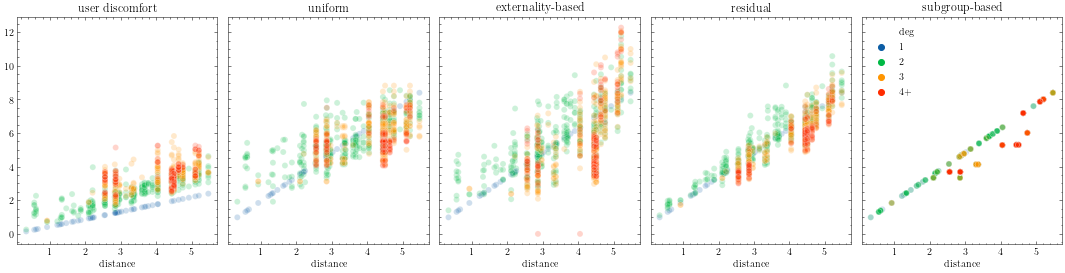

In [53]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
titles = ['user discomfort','uniform', 'externality-based','residual','subgroup-based']

fig, axes = plt.subplots(1,len(cols), figsize = (len(cols)*3,4), sharey=True)
df = inData.sblts.rides_multi_index
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000

for i,col in enumerate(cols):
    
    
    axes[i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[i], hue = 'deg', alpha = 0.2, palette = palette)
    axes[i].set_ylabel('')
    if i<len(cols)-1:
        axes[i].get_legend().remove()
#plf.savefig('f3.png')
plt.tight_layout() 
#plt.savefig('res_1.tiff', dpi = 600)
#plt.savefig('res_1.jpg', dpi = 600)
#plt.savefig('res_1.pdf', rasterized = True)

In [87]:
rs = inData.sblts.rides.iloc[-4].name
rm = inData.sblts.rides_multi_index
inData = pricings.subgroup_split(inData) 
group = inData.sblts.rides_multi_index.loc[rs,:]
group

,ride,traveller,shared,degree,treq,ride_time,dist,ttrav,ttrav_sh,delay,distance,cost_veh,cost_user,total_group_cost,cost_single,total_singles,residual_user,UNIFORM,desired_UNIFORM,EXTERNALITY,desired_EXTERNALITY,RESIDUAL,desired_RESIDUAL,SUBGROUP,travel time,user discomfort,deg,price_subgroup
17,352,17,True,5,109,995,4443,555,701,-72.0,7960,8.50975,3.32220,26.2894,6.91025,29.9197,-3.6303,5.25788,4.059875,5.91185,2.970800,6.071796,4.863541,5.298225,701,3.32220,4+,5.298225
2,352,2,True,5,19,995,4504,563,672,87.0,7960,8.50975,3.27915,26.2894,7.00265,29.9197,-3.6303,5.25788,4.059875,5.74035,3.080700,6.152985,4.928574,5.298225,672,3.27915,4+,5.298225
6,352,6,True,5,71,995,4636,579,846,115.0,7960,8.50975,4.15695,26.2894,7.18745,29.9197,-3.6303,5.25788,4.834310,10.04990,5.336800,6.315362,5.590708,7.187450,846,4.15695,4+,7.187450
35,352,35,True,5,243,995,2861,357,678,111.0,7960,8.50975,3.43035,26.2894,4.62335,29.9197,-3.6303,5.25788,3.689450,6.16665,0.000000,4.062377,3.253985,3.689450,678,3.43035,4+,3.689450
33,352,33,True,5,229,995,2561,320,595,208.0,7960,8.50975,3.59100,26.2894,4.19600,29.9197,-3.6303,5.25788,3.689450,6.28040,2.415875,3.686879,2.997545,3.689450,595,3.59100,4+,3.689450


In [79]:
inData.sblts.rides.iloc[-4:-3]

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected,treqs,deps,delays,ttravs,pruned,indexes_set,subgroups,supergroups,rankings,mean_ranking,rel_rankings,mean_rel_ranking,PoAs,mean_PoA,total_PoA,squared_PoA,probs,min_prob,logsum_prob,costs_user,costs_veh,costs_total,total_group_cost,cost_efficiency,total_singles,residual,UNIFORM,EXTERNALITY,RESIDUAL,SUBGROUP,total_price_subgroup,excess_subgroup
352,"[17, 2, 6, 35, 33]",34.86105,995,52,"[8.29605, 7.641199999999999, 8.762599999999999...","[37.0, 69, 80, 168, 83, 301, 1, 39, 35, 219]","[17, 2, 6, 35, 33]","[17, 2, 35, 33, 6]",5,352,0.580876,2374,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,"[109, 19, 71, 243, 229]","[37.0, 106.0, 186.0, 354.0, 437.0]","[-72.0, 87.0, 115.0, 111.0, 208.0]","[701, 672, 846, 678, 595]",True,"{33, 2, 35, 6, 17}","[2, 6, 17, 33, 35, 78, 79, 80, 84, 85, 86, 89,...","[352, 353, 354, 355]","[79.0, 11.0, 38.0, 40.0, 58.0]",45.2,"[0.8494623655913979, 0.12222222222222222, 0.77...",0.67392,"[1.1000000000000005, 0.1999999999999993, 1.100...",0.72,3.6,0.636,"[3.5223375426141554e-06, 0.03720022209446148, ...",0.000004,-42.274797,17.77965,8.50975,26.2894,26.2894,5.25788,29.9197,-3.6303,26.2894,26.2894,-3.6303,25.1628,25.1628,-1.1266


In [74]:
def get_subgroup_price(r):
    # assigns traveller prices by their best alternatives
    indexes_set = r.indexes_set  # travellers of this group
    subgroups = r.subgroups # subgroups of this group
    subgroup_indexes = rides.loc[subgroups][['indexes_set']]  # travellers indexes in the subgroups

    prices = dict()  # return dict to populat
    while len(indexes_set) > 0:  # until everyone is assigned
        effs = rides.loc[subgroups].cost_efficiency  # see the efficiencies of remaining subgroups
        
        J, z  = effs.idxmin(), effs.min()  # pick up the subgroup of greatest efficiency and its index
        print('best subgroup {} of cost {}, for {}'.format(J,z, rides.loc[J].indexes_set))
        for i in rides.loc[J].indexes_set:
            prices[i] = z # assign the prices

        indexes_set = indexes_set - rides.loc[J].indexes_set  # remove those from the best group
        subgroup_indexes = rides.loc[subgroups][['indexes_set']]
        subgroup_indexes['f'] = subgroup_indexes.apply(
            lambda x: len(rides.loc[J].indexes_set.intersection(x.indexes_set)) == 0, axis=1) # update which
        # subgroups remain assignable
        subgroups = subgroup_indexes[subgroup_indexes.f].index  # filter to those not assigned
        # loop and assign the ones who are not assigned left

    return prices
rides = inData.sblts.rides
get_subgroup_price(inData.sblts.rides.iloc[-4])

best subgroup 78 of cost 3.68945, for {33, 35}
best subgroup 176 of cost 5.298225, for {17, 2}
best subgroup 6 of cost 7.18745, for {6}


{33: 3.68945, 35: 3.68945, 17: 5.298225, 2: 5.298225, 6: 7.18745}

In [72]:
subgroups = inData.sblts.rides.iloc[-4].subgroups
rides.loc[subgroups].sort_values('cost_efficiency')[['cost_efficiency','indexes']]

,cost_efficiency,indexes
78,3.689450,"[35, 33]"
173,3.993250,"[35, 33]"
343,4.059875,"[2, 17, 35, 33]"
329,4.101875,"[2, 17, 35, 33]"
292,4.142375,"[2, 35, 33]"
...,...,...
147,6.782225,"[2, 6]"
17,6.910250,[17]
2,7.002650,[2]
6,7.187450,[6]


In [37]:
for r in inData.sblts.rides_multi_index.loc[rs,:].traveller.values:

    print(r, rm[rm.traveller == r].total_group_cost.min(), rm[rm.traveller == r].cost_user.min())

17 6.91025 1.9425000000000001
2 7.00265 1.9705000000000001
6 7.18745 2.0265
35 4.62335 1.2495
33 4.196 1.12


### pricings with various strategies

In [83]:
inData = ExMAS.extras.pricings.update_costs(inData, params)
inData = pricings.uniform_split(inData) 
inData = pricings.externality_split(inData) 
inData = pricings.residual_split(inData) 
inData = pricings.subgroup_split(inData) 
rs = inData.sblts.rides.sample(4).index
plt.rcParams['figure.figsize'] = [12,12]
fig, ax = plt.subplots()
#scatter_matrix(inData.sblts.rides_multi_index[['dist', 'ttrav_sh', 'UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP', 'total_group_cost']], grid = False, diagonal = 'kde', alpha = 0.2, ax = ax)
fig.suptitle('correlations between various prices and features')
inData.sblts.rides_multi_index.loc[rs,:]

ValueError: attempt to get argmin of an empty sequence

# Differences between algorithms and pricings

## TNE

In [12]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_TNE, PRICING = PRICING, ALGO = 'TNE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:21:10-WARNING-Pruned nRides 51/222
15-12-20 16:21:10-WARNING-UNIFORM-TNE-UNIFORM-min
15-12-20 16:21:11-INFO-Matching 50 trips to 222 rides in order to min UNIFORM
15-12-20 16:21:11-INFO-Problem solution: Optimal. 
Total costs for single trips:            162 
reduced by matching to:                  159
15-12-20 16:21:11-INFO-DotMap(VehHourTrav=15108, VehHourTrav_ns=17058, PassHourTrav=17711, PassHourTrav_ns=17058, PassUtility=253.51685, PassUtility_ns=264.633, mean_lambda=0.30019524894240157, revenue_s=17910.899999999998, revenue_ns=25587.0, Fare_Discount=-0.3000000000000001, nR=50, SINGLE=36, PAIRS=7, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.28, fleet_size_nonshared=45.0, fleet_size_shared=38.0, lambda_shared=0.30019524894240157)
15-12-20 16:21:11-WARNING-Pruned nRides 61/222
15-12-20 16:21:11-WARNING-EXTERNALITY-TNE-EXTERNALITY-min
15-12-20 16:21:12-INFO-Matching 50 trips to 222 rides in order to min EXTERNALITY
15-12-20 16:21:12-INFO-Problem solution

,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,15108,17711,0.28,90.7192,68.9161,43,159.635
EXTERNALITY,15108,17711,0.28,90.7192,68.9161,43,159.635
RESIDUAL,15108,17711,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,15815,19702,0.76,88.755,100.877,31,162.314


## Hermetic

In [13]:
ret = dict()
params.logger_level = 'WARNING'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_HERMETIC, PRICING = PRICING, ALGO = 'HERMETIC', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:21:15-WARNING-Pruned nRides 51/222
15-12-20 16:21:15-WARNING-UNIFORM-HERMETIC-UNIFORM-min
15-12-20 16:21:16-WARNING-Pruned nRides 58/222
15-12-20 16:21:16-WARNING-EXTERNALITY-HERMETIC-EXTERNALITY-min
15-12-20 16:21:17-WARNING-Pruned nRides 58/222
15-12-20 16:21:17-WARNING-RESIDUAL-HERMETIC-RESIDUAL-min
15-12-20 16:21:20-WARNING-Pruned nRides 222/222
15-12-20 16:21:20-WARNING-SUBGROUP-HERMETIC-SUBGROUP-min


,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,15108,17711,0.28,90.7192,68.9161,43,159.635
EXTERNALITY,15108,17711,0.28,90.7192,68.9161,43,159.635
RESIDUAL,15108,17711,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,15815,19702,0.76,88.755,100.877,31,162.314


## RUE

In [14]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_RUE, PRICING = PRICING, ALGO = 'RUE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:21:21-INFO-Mergeable groups: 25-30
15-12-20 16:21:22-INFO-Mergeable groups: 5-88
15-12-20 16:21:22-INFO-Mergeable groups: 47-148
15-12-20 16:21:22-WARNING-Pruned nRides 222/222
15-12-20 16:21:22-WARNING-UNIFORM-RUE-UNIFORM-min
15-12-20 16:21:22-INFO-Matching 50 trips to 222 rides in order to min UNIFORM
15-12-20 16:21:22-INFO-Adding 3 mutually exlcusive constrains
15-12-20 16:21:22-INFO-Problem solution: Optimal. 
Total costs for single trips:            162 
reduced by matching to:                  159
15-12-20 16:21:22-INFO-DotMap(VehHourTrav=15108, VehHourTrav_ns=17058, PassHourTrav=17711, PassHourTrav_ns=17058, PassUtility=253.51685, PassUtility_ns=264.633, mean_lambda=0.30019524894240157, revenue_s=17910.899999999998, revenue_ns=25587.0, Fare_Discount=-0.3000000000000001, nR=50, SINGLE=36, PAIRS=7, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.28, fleet_size_nonshared=45.0, fleet_size_shared=38.0, lambda_shared=0.30019524894240157)
15-12-20 16:21:22-INFO

,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,15108,17711,0.28,90.7192,68.9161,43,159.635
EXTERNALITY,15108,17711,0.28,90.7192,68.9161,43,159.635
RESIDUAL,15108,17711,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,15815,19702,0.76,88.755,100.877,31,162.314


## RSIE

In [15]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_RSIE, PRICING = PRICING, ALGO = 'RSIE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:21:27-WARNING-Searching unstable pairs 0/222. 0 found so far
15-12-20 16:21:36-WARNING-Searching unstable pairs 20/222. 96 found so far
15-12-20 16:21:44-WARNING-Searching unstable pairs 40/222. 157 found so far
15-12-20 16:21:51-WARNING-Searching unstable pairs 60/222. 186 found so far
15-12-20 16:21:56-WARNING-Searching unstable pairs 80/222. 193 found so far
15-12-20 16:22:01-WARNING-Searching unstable pairs 100/222. 205 found so far
15-12-20 16:22:06-WARNING-Searching unstable pairs 120/222. 205 found so far
15-12-20 16:22:10-WARNING-Searching unstable pairs 140/222. 210 found so far
15-12-20 16:22:15-WARNING-Searching unstable pairs 160/222. 239 found so far
15-12-20 16:22:19-WARNING-Searching unstable pairs 180/222. 239 found so far
15-12-20 16:22:24-WARNING-Searching unstable pairs 200/222. 240 found so far
15-12-20 16:22:28-WARNING-Searching unstable pairs 220/222. 240 found so far
15-12-20 16:22:28-WARNING-Pruned nRides 222/222
15-12-20 16:22:28-WARNING-UNIFORM-RSI

,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,15108,17711,0.28,90.7192,68.9161,43,159.635
EXTERNALITY,15108,17711,0.28,90.7192,68.9161,43,159.635
RESIDUAL,15108,17711,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,15197,19623,0.8,85.5113,95.9004,30,162.314


## TSE

In [16]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_TSE, PRICING = PRICING, ALGO = 'TSE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:25:26-WARNING-Pruned nRides 222/222
15-12-20 16:25:26-INFO-DotMap(VehHourTrav=16748, VehHourTrav_ns=17058, PassHourTrav=19623, PassHourTrav_ns=17058, PassUtility=248.87515, PassUtility_ns=264.633, mean_lambda=0.30825496342737724, revenue_s=17910.899999999998, revenue_ns=25587.0, Fare_Discount=-0.3000000000000001, nR=50, SINGLE=48, PAIRS=1, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.040000000000000036, fleet_size_nonshared=45.0, fleet_size_shared=44.0, lambda_shared=0.953082919914954)
15-12-20 16:25:26-WARNING-Pruned nRides 222/222
15-12-20 16:25:26-INFO-DotMap(VehHourTrav=16748, VehHourTrav_ns=17058, PassHourTrav=19623, PassHourTrav_ns=17058, PassUtility=248.87515, PassUtility_ns=264.633, mean_lambda=0.30825496342737724, revenue_s=17910.899999999998, revenue_ns=25587.0, Fare_Discount=-0.3000000000000001, nR=50, SINGLE=48, PAIRS=1, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.040000000000000036, fleet_size_nonshared=45.0, fleet_size_shared=4

,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,16748,19623,0.04,100.772,61.3221,49,162.094
EXTERNALITY,16748,19623,0.04,100.772,61.3221,49,162.094
RESIDUAL,15108,19623,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,17058,19623,0,102.614,59.703,50,162.314


---
(c) Rafał Kucharski, Delft, 2020